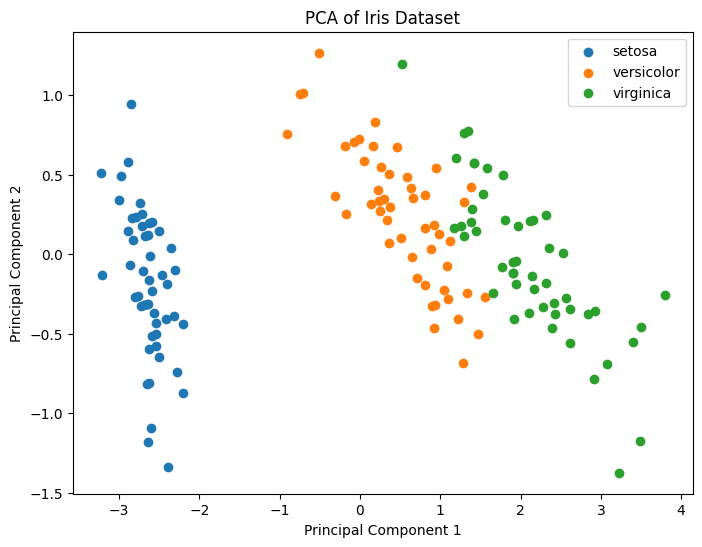

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        cov_matrix = np.cov(X.T)
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[idxs]
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA
pca = PCA(n_components=2)
pca.fit(X)
X_transformed = pca.transform(X)

# Plot the transformed data
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1], label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()


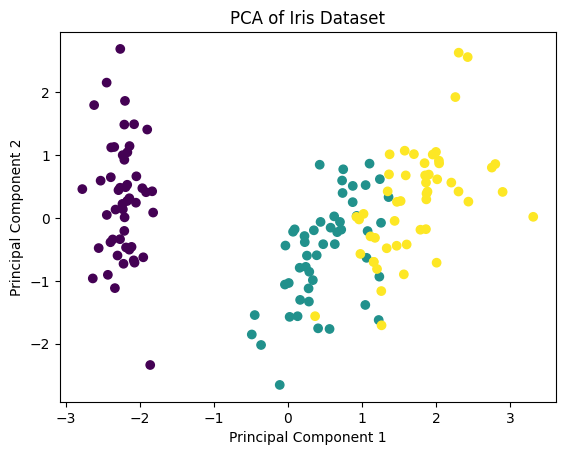

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA model to the data
pca.fit(X_std)

# Transform the data to the new subspace
X_pca = pca.transform(X_std)

# Plot the data in the new subspace
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.show()